Назва дисципліни: Обробка та аналіз біомедичних даних

Група: БС-83

Студент: Каліновська Б.В.

Лабораторна робота №6

Тема:Парний t-критерій Стьюдента

Завдання:

1. Обрати реальні дані з kaggle або сгенерувати випадкові дані. Дані мають відповідати вимогам

In [3]:
#Імпортування бібліотек
import numpy as np
import pandas as pd
import scipy.stats as ss
import seaborn as sns
import math
import matplotlib.pyplot as plt

In [49]:
#Складаємо таблицю
#Будуємо таблицю спряженості
#Студентам міряли пульс до заняття та після
columns_before = [60,65,67,62,68,65,70,68,60,62,70,63,67,68]
columns_after = [86,95,100,88,110,95,84,95,84,82,115,88,84,86]
st_table = pd.DataFrame({'Пульс(до)':columns_before,
                            'Пульс(після)':columns_after},
                            index=np.arange(1, len(columns_before) + 1))
st_table.columns.name = '№'

st_table

№,Пульс(до),Пульс(після)
1,60,86
2,65,95
3,67,100
4,62,88
5,68,110
6,65,95
7,70,84
8,68,95
9,60,84
10,62,82


2. Побудувати графік, що відображає розкид даних в групах

[Text(0, 0.5, 'Виміри пульсу у студентів до та після фізичного навантаження'),
 Text(0.5, 0, 'Пульс')]

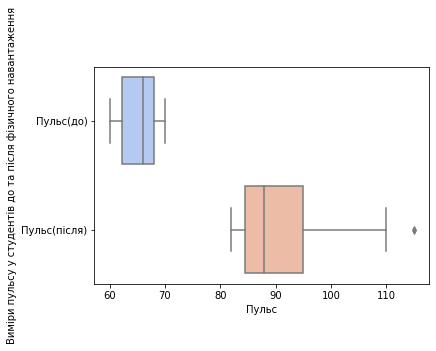

In [50]:
#Діаграма розмаху, коро́бковий графік, графік «ящик з вусами» — засіб візуалізації в описовій статистиці груп числових даних 
#через їх квантилі. Коробковий графік може також мати лінії, які виходять вертикально з коробки (вони називаються вусами), 
#вони вказують величину мінливості поза верхньою та нижньою межами квантиля. Викиди може бути нанесено у вигляді точок.

sns.boxplot( data=st_table, orient='h', palette='coolwarm').set(xlabel='Пульс', 
                                                        ylabel='Виміри пульсу у студентів до та після фізичного навантаження')

3. Написати функцію для оцінки зв'язку між групами за коефіцієнтом кореляції Пірсона. Функція має повертати значення коефіцієнту кореляції, значення ступеня свободи та результат оцінки значимості зв'зку (significant або not significant)

In [110]:
#Коефіцієнт кореції Пірсона обчислюється за формулою 
#r=n*sum_product - (sum_b * sum_a) / sqrt((n*sum_sq_b - sum_sum_b)*(n*sum_sq_a - sum_sum_a))

def Pirson_koef(col_b, col_a):
    n=len(col_b) #n - кількість
    
    sum_product = 0
    for i in range(len(col_b)):
        sum_product += col_b[i] * col_a[i] 
    
    sum_b=sum(col_b)
    sum_a=sum(col_a)
    
    sum_sum_b = sum_b**2
    sum_sum_a = sum_a**2
    
    sum_sq_b = 0
    sum_sq_a = 0
    for i in range(len(col_b)):
        sum_sq_b += col_b[i] **2
        sum_sq_a += col_a[i] **2
        
    r=((n*sum_product) - (sum_b*sum_a))/math.sqrt(((n*sum_sq_b) - sum_sum_b) * ((n*sum_sq_a) - sum_sum_a))
    print("Коефіцієнт Пірсона: r = ", r)
    
    #Розраховуємо число ступенів свободи
    df = n-2
    print("Число ступенів свободи: df = ", df)
    
     #Робота з файлом
  
    #Загружаємо необхідні бібліотеки
    import xlrd, xlwt
    #Відкриваємо xlsx файл
    rb = xlrd.open_workbook('tabl_1_Pirson_koef.xlsx')
    #Вибираємо активний лист (в нашому випадку це лист 2 но так як індексація з 0 тому 1)
    sheet = rb.sheet_by_index(0)
    #Отримуємо значення необхідної нам ячейки (номер рядка - тобто ступінь свободи)[номер стовпчика]
    r_tabl = sheet.row_values(df)[1]
    print("Критичне значення: r_tabl = ",r_tabl)
    
    if(r_tabl < r):
        result = "significant"
    else:
        result = "not significant"
    print("Результат оцінки значимості зв'язку:", result)

In [111]:
#Перед визначенням відмінності за парним критерієм Стьюента необхідно перевірити чи є зв'язок між групами
#Для цього використовують коефіцієнт кореляції Пірсона

Pirson_koef(columns_before, columns_after)

Коефіцієнт Пірсона: r =  0.5233418506822685
Число ступенів свободи: df =  12
Критичне значення: r_tabl =  0.5324
Результат оцінки значимості зв'язку: not significant


4. Написати функцію для визначення відмінності між групами за критерієм Стьюдента. Функція має повертати значення критерію Стьюдента,значення ступеня свободи та результат оцінки значимості зв'зку (significant або not significant)

In [118]:
#Функція для обчислення коефіцієнту Стюдента обчислюється за формулою
#t_st = (Md/qd) * sqrt(n) 

def Student_koef(st_table, col_b, col_a):
    diff = []
    n = len(col_b)
 
    for i in range(n):
        diff.append(col_b[i] - col_a[i])
    
    #Зобразимо таблицю зі значеннями різниці
    st_table["До - Після"] = diff
    st_table.append(diff)
    print(st_table)
    
    #Середнє значення різниці
    Md = sum(diff)/n 
    
    #Стандартне відхилення між значеннями 
    sum_znach = 0
    for i in range(n):
        sum_znach += (Md - diff[i])**2
        
    qd = math.sqrt(sum_znach/(n-1))
    
    #Значення критерія Стюдента
    t_st = (Md/qd)*math.sqrt(14)
    print('')
    print("Значення критерію Стюдента: t_st = ", abs(t_st))
    
    #Знаходимо значення ступеня свободи критерію
    df = n - 1
    print("Число ступенів свободи: df = ", df)
    
    import xlrd, xlwt
    #Відкриваємо xlsx файл
    rb = xlrd.open_workbook('tabl_2_Student_koef.xlsx')
    #Вибираємо активний лист (в нашому випадку це лист 2 но так як індексація з 0 тому 1)
    sheet = rb.sheet_by_index(0)
    #Отримуємо значення необхідної нам ячейки (номер рядка - тобто ступінь свободи)[номер стовпчика]
    t_tabl = sheet.row_values(df)[1]
    
    print("Критичне значення: t_tabl = ",t_tabl)
    
    if(t_tabl < abs(t_st)):
        result = "significant"
    else:
        result = "not significant"
    print("Результат оцінки значимості зв'язку:", result)
    
    

In [119]:
Student_koef(st_table,columns_before, columns_after)

№   Пульс(до)  Пульс(після)  До - Після
1          60            86         -26
2          65            95         -30
3          67           100         -33
4          62            88         -26
5          68           110         -42
6          65            95         -30
7          70            84         -14
8          68            95         -27
9          60            84         -24
10         62            82         -20
11         70           115         -45
12         63            88         -25
13         67            84         -17
14         68            86         -18

Значення критерію Стюдента: t_st =  11.392099876406263
Число ступенів свободи: df =  13
Критичне значення: t_tabl =  2.16
Результат оцінки значимості зв'язку: significant


5. Сформувати висновок про взаємозв'язок між групами та про їх розбіжність

Висновок:

Аналізуючи пульс студетів до та після фізичних навантажень можна зробити висновок що:
1. Статистичної залежності немає. Так як коефіцієнт кореляції менший за табличне ( r_tabl < r )
2. Присутня наявність статистично значущих відмінностей пульсу студентів до та після навантаження (так як t_tabl < t_st), звітси слідує, що була прийнята альтернативна гіпотеза про відмінність середніх